<a href="https://colab.research.google.com/github/levchenkopavlo/AI/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Завдання 1
Виведіть середнє значення та медіану для `order_quantity`. Чи є викиди?

In [ ]:
sales['Order_Quantity'].mean()

11.901659648253654

In [ ]:
sales['Order_Quantity'].median()

10.0

In [ ]:
q1 = sales['Order_Quantity'].quantile(0.25)
q3 = sales['Order_Quantity'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = sales[(sales['Order_Quantity'] < lower) | (sales['Order_Quantity'] > upper)]

print(outliers)

Empty DataFrame
Columns: [Date, Day, Month, Year, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, Revenue]
Index: []


# Завдання 2
Намалюйте гістограму та ящик з вусами для `order_quantity`

<Axes: >

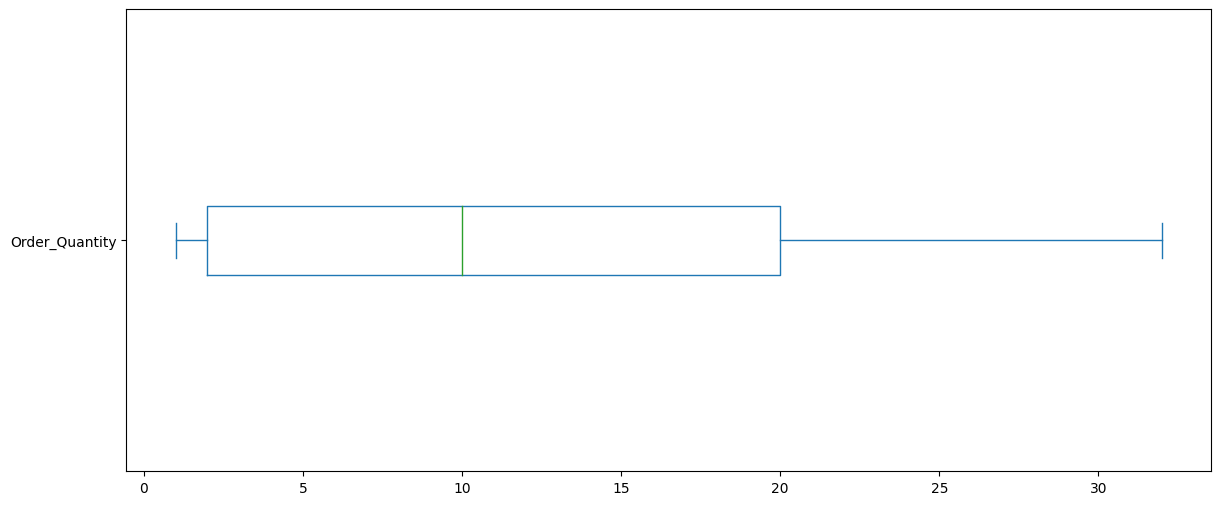

In [ ]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

# Завдання 3
Очистіть дані від викидів. Алгоритм:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Обчислюємо медіану `median`
3. Очислюємо значення `IQR = q3 - q1`
4. Обчислюємо `lower = q1 - 1.5*IQR`
5. Обчислюємо `upper = q3 + 1.5*IQR`
6. Викидами вважаємо значення які `< lower` або `>upper`

In [ ]:
from re import T
def remove_outliers(df, column_name):
  global flag
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)
  outliers = df[(df[column_name] < lower) | (df[column_name] > upper)]
  if not outliers.empty:
    flag = False
  else:
    flag = True
  return df[mask]


sales1 = sales.copy()
print(sales.shape)

flag = True
while flag:
  for column_name in sales1.columns:
    if sales1.dtypes[column_name] in ("object", "datetime64[ns]"):
      continue

    sales1 = remove_outliers(sales1, column_name)

  print(sales1.shape)


(113036, 18)
(67414, 18)


<Axes: >

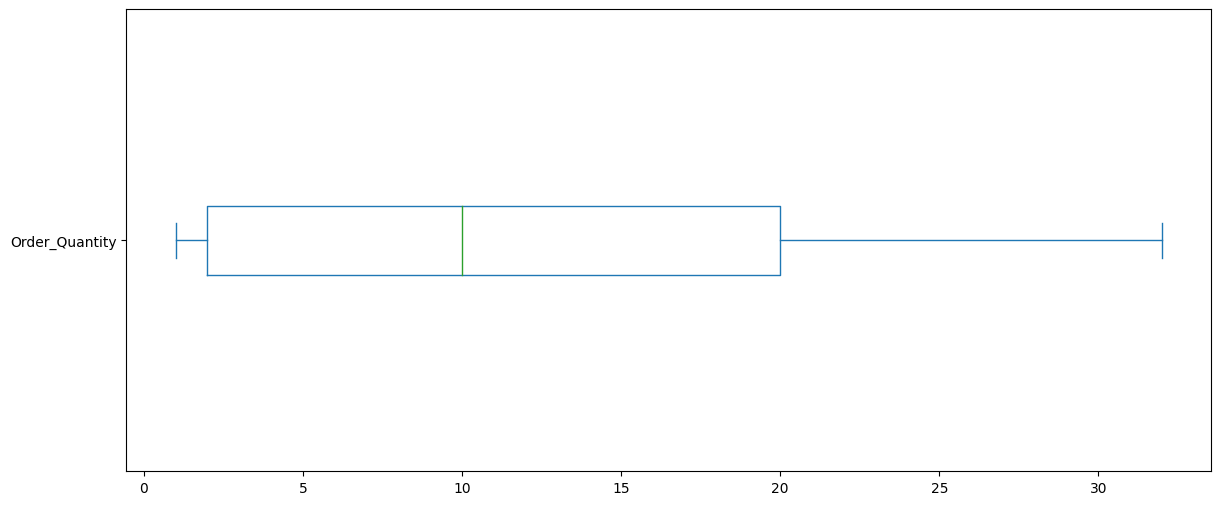

In [ ]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

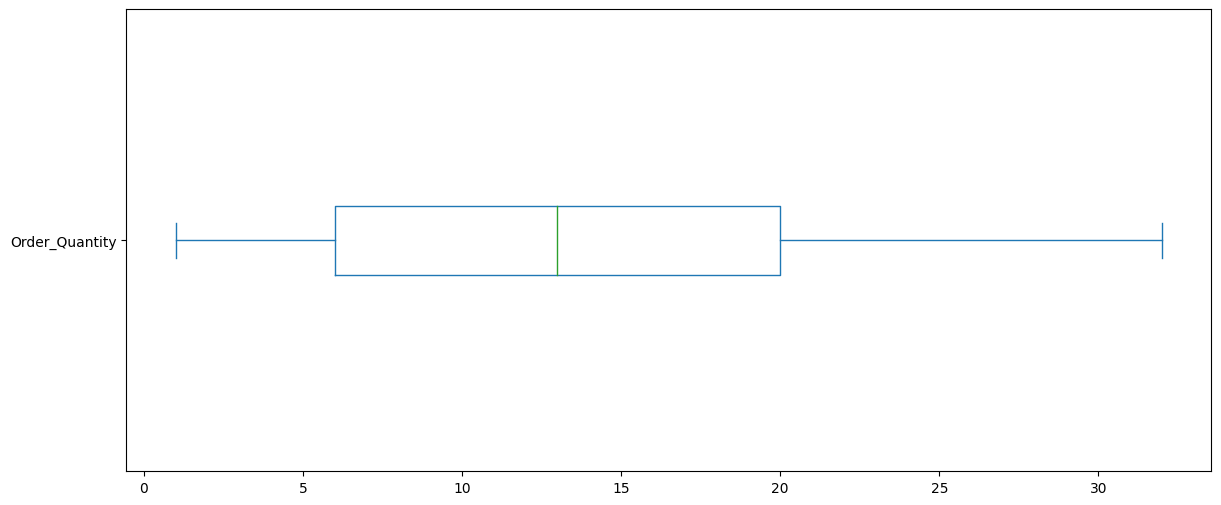

In [ ]:
sales1['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

# Завдання 4
Ввиведіть гістограму з кількістю чоловіків та жінок серед покупців.

# Завдання 5
Виведіть точкову діаграму для ознак `order_quantity` та `revenue`

# Завдання 6
Знайдіть категоріальну характеристику, від якої залежить ознака `profit`